<a href="https://colab.research.google.com/github/reyaput/Data/blob/main/Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np

In [75]:
drive_url = "https://drive.google.com/uc?export=download&id=1uFanO9ZsnruhuzXIXnr1tkK1W0u9TlUn"

sample = pd.read_csv(drive_url, encoding='latin1')

display(sample.head())

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [76]:
missing_values = sample.isnull().sum()

display(missing_values)

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [77]:
sample = sample.drop(["ADDRESSLINE2", "STATE", "TERRITORY"], axis=1)

display(sample.head())

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,NaN,USA,Brown,Julie,Medium


In [78]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  CITY              2823 non-null   object 


In [79]:
sample['ORDERDATE'] = pd.to_datetime(sample['ORDERDATE'])
sample['MSRP'] = pd.to_numeric(sample['MSRP'])

display(sample.head())
sample.info()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,NaN,USA,Brown,Julie,Medium


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [80]:
print("Nilai unik di kolom 'PRODUCTLINE':")
display(sample['PRODUCTLINE'].unique())

print("\nNilai unik di kolom 'COUNTRY':")
display(sample['COUNTRY'].unique())

Nilai unik di kolom 'PRODUCTLINE':


array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)


Nilai unik di kolom 'COUNTRY':


array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [81]:
sample['SALES'] = sample['QUANTITYORDERED'] * sample['PRICEEACH']

display(sample.head())

sample['CALCULATED_SALES'] = sample['QUANTITYORDERED'] * sample['PRICEEACH']
differences_after_correction = sample[~np.isclose(sample['SALES'], sample['CALCULATED_SALES'])]

if not differences_after_correction.empty:
    print("Masih ditemukan perbedaan setelah koreksi:")
    display(differences_after_correction[['ORDERNUMBER', 'SALES', 'CALCULATED_SALES', 'QUANTITYORDERED', 'PRICEEACH']])
else:
    print("Kolom 'SALES' sekarang sudah benar dan konsisten dengan 'QUANTITYORDERED * PRICEEACH'.")

sample = sample.drop(columns=['CALCULATED_SALES'])

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10159,49,100.00,14,4900.00,2003-10-10,Shipped,4,10,2003,...,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,NaN,USA,Brown,Julie,Medium


Kolom 'SALES' sekarang sudah benar dan konsisten dengan 'QUANTITYORDERED * PRICEEACH'.


In [82]:
duplicates = sample[sample.duplicated(subset=['ORDERNUMBER'], keep=False)]

if not duplicates.empty:
    print(f"Ditemukan {len(duplicates)} baris duplikat berdasarkan ORDERNUMBER.")
    print("Berikut beberapa contoh baris duplikat:")
    display(duplicates.sort_values(by='ORDERNUMBER').head())

    initial_rows = sample.shape[0]
    sample.drop_duplicates(subset=['ORDERNUMBER'], keep='first', inplace=True)
    removed_rows = initial_rows - sample.shape[0]
    print(f"\n{removed_rows} baris duplikat telah dihapus. Jumlah baris setelah penghapusan: {sample.shape[0]}")
else:
    print("Tidak ditemukan baris duplikat berdasarkan ORDERNUMBER.")

sample.info()

Ditemukan 2807 baris duplikat berdasarkan ORDERNUMBER.
Berikut beberapa contoh baris duplikat:


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
680,10100,50,67.80,2,3390.00,2003-01-06,Shipped,1,1,2003,...,S18_2248,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,Young,Valarie,Medium
1267,10100,22,86.51,4,1903.22,2003-01-06,Shipped,1,1,2003,...,S18_4409,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,Young,Valarie,Small
578,10100,30,100.00,3,3000.00,2003-01-06,Shipped,1,1,2003,...,S18_1749,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,Young,Valarie,Medium
2024,10100,49,34.47,1,1689.03,2003-01-06,Shipped,1,1,2003,...,S24_3969,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,Young,Valarie,Small
830,10101,26,100.00,1,2600.00,2003-01-09,Shipped,1,1,2003,...,S18_2795,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,60528,Germany,Keitel,Roland,Medium



2516 baris duplikat telah dihapus. Jumlah baris setelah penghapusan: 307
<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, 0 to 2733
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       307 non-null    int64         
 1   QUANTITYORDERED   307 non-null    int64         
 2   PRICEEACH         307 non-null    float64       
 3   ORDERLINENUMBER   307 non-null    int64         
 4   SALES             307 non-null    float64       
 5   ORDERDATE         307 non-null    datetime64[ns]
 6   STATUS            307 non-null    object        
 7   QTR_ID            307 non-null    int64         
 8   MONTH_ID          307 non-null    int64         
 9   YEAR_ID           307 non-null    int64         
 10  PRODUCTLINE       307 non-null    object        
 11  MSRP              307 non-null    int64         
 12  PRODUCTCODE       307 non-null    object        
 13  CUSTOMERNA

In [83]:
duplicates_after_check = sample[sample.duplicated(subset=['ORDERNUMBER'], keep=False)]

if not duplicates_after_check.empty:
    print(f"Masih ditemukan {len(duplicates_after_check)} baris duplikat berdasarkan ORDERNUMBER.")
    print("Berikut beberapa contoh baris duplikat:")
    display(duplicates_after_check.sort_values(by='ORDERNUMBER').head())
else:
    print("Tidak ditemukan baris duplikat berdasarkan ORDERNUMBER setelah penghapusan.")

sample.info()

Tidak ditemukan baris duplikat berdasarkan ORDERNUMBER setelah penghapusan.
<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, 0 to 2733
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       307 non-null    int64         
 1   QUANTITYORDERED   307 non-null    int64         
 2   PRICEEACH         307 non-null    float64       
 3   ORDERLINENUMBER   307 non-null    int64         
 4   SALES             307 non-null    float64       
 5   ORDERDATE         307 non-null    datetime64[ns]
 6   STATUS            307 non-null    object        
 7   QTR_ID            307 non-null    int64         
 8   MONTH_ID          307 non-null    int64         
 9   YEAR_ID           307 non-null    int64         
 10  PRODUCTLINE       307 non-null    object        
 11  MSRP              307 non-null    int64         
 12  PRODUCTCODE       307 non-null    object        
 13  CUSTOMER

In [84]:
Total_Penjualan = sample['SALES'].sum()
print(f"Total Penjualan: {Total_Penjualan}")

average = sample['SALES'].mean()
print(f"Rata-rata Penjualan: {average}")

terlaris = sample.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum()
display(terlaris)

produk_terlaris = terlaris.idxmax()
print(f"Produk Terlaris: {produk_terlaris} dengan total kuantitas penjualan: {terlaris[produk_terlaris]}")

Total Penjualan: 1008845.72
Rata-rata Penjualan: 3286.1424104234525


,QUANTITYORDERED
PRODUCTLINE,
Classic Cars,5787
Motorcycles,1682
Planes,704
Ships,176
Trains,59
Trucks and Buses,468
Vintage Cars,1932


Produk Terlaris: Classic Cars dengan total kuantitas penjualan: 5787


In [85]:
sales_by_year = sample[sample['YEAR_ID'].isin([2003, 2004, 2005])].groupby('YEAR_ID')['SALES'].sum()
display(sales_by_year)

sales_by_city = sample.groupby('CITY')['SALES'].sum()
display(sales_by_city)

,SALES
YEAR_ID,
2003,344936.00
2004,469572.10
2005,194337.62


,SALES
CITY,
Aaarhus,6600.00
Allentown,17131.09
Barcelona,12498.90
Bergamo,11300.00
Bergen,11300.00
...,...
Toulouse,7477.60
Tsawassen,4324.72
Vancouver,8700.00


In [86]:
sales_2003 = sample[sample['YEAR_ID'] == 2003]
monthly_sales_2003 = sales_2003.groupby('MONTH_ID')['SALES'].sum()
display(monthly_sales_2003)

sales_2004 = sample[sample['YEAR_ID'] == 2004]
monthly_sales_2004 = sales_2004.groupby('MONTH_ID')['SALES'].sum()
display(monthly_sales_2004)

sales_2005 = sample[sample['YEAR_ID'] == 2005]
monthly_sales_2005 = sales_2005.groupby('MONTH_ID')['SALES'].sum()
display(monthly_sales_2005)

,SALES
MONTH_ID,
1,15400.00
2,11471.00
3,17888.78
4,23705.12
5,18665.90
6,21347.83
7,21764.54
8,15683.90
9,27655.58


,SALES
MONTH_ID,
1,28902.02
2,39800.00
3,24888.40
4,27682.38
5,27827.80
6,31881.78
7,32935.78
8,39548.68
9,37328.99


,SALES
MONTH_ID,
1,37602.86
2,33891.09
3,33893.85
4,38695.37
5,50254.45


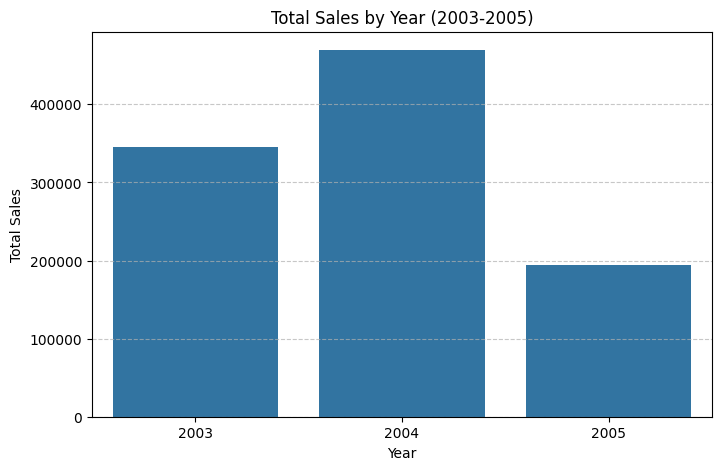

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_year.index, y=sales_by_year.values)
plt.title('Total Sales by Year (2003-2005)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

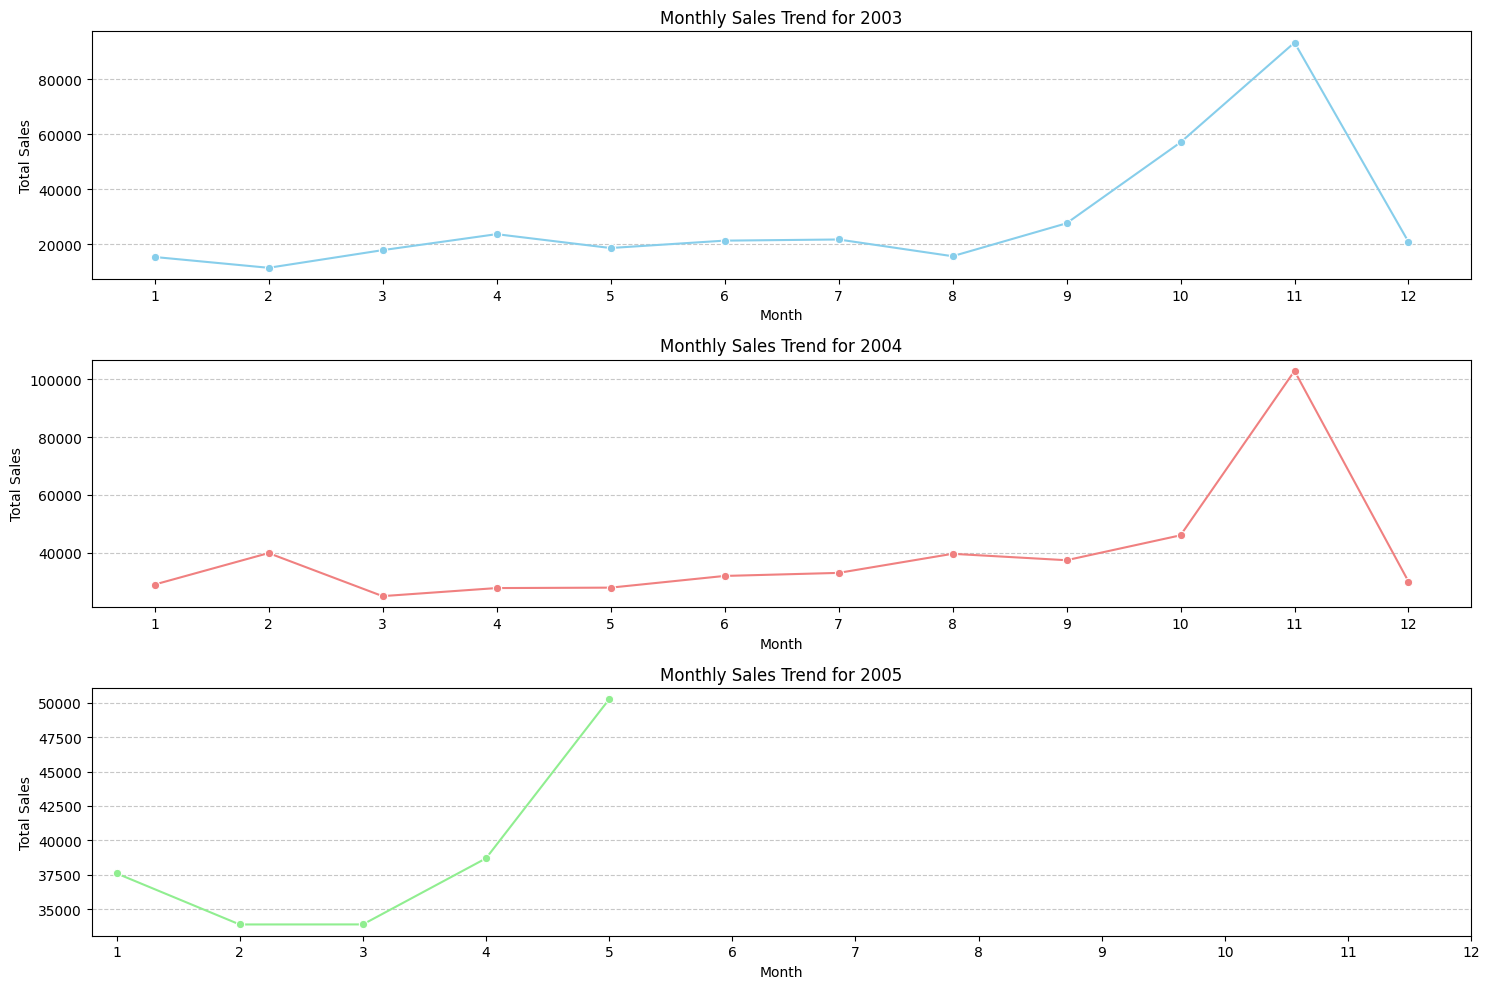

In [88]:
plt.figure(figsize=(15, 10))

# Plot for 2003
plt.subplot(3, 1, 1)
sns.lineplot(x=monthly_sales_2003.index, y=monthly_sales_2003.values, marker='o', color='skyblue')
plt.title('Monthly Sales Trend for 2003')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for 2004
plt.subplot(3, 1, 2)
sns.lineplot(x=monthly_sales_2004.index, y=monthly_sales_2004.values, marker='o', color='lightcoral')
plt.title('Monthly Sales Trend for 2004')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for 2005
plt.subplot(3, 1, 3)
sns.lineplot(x=monthly_sales_2005.index, y=monthly_sales_2005.values, marker='o', color='lightgreen')
plt.title('Monthly Sales Trend for 2005')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**INSIGHT**

Dari analisis data yang telah dibersihkan, terlihat jelas bahwa pola penjualan di tahun 2005 berbeda signifikan dibandingkan tahun 2003 dan 2004. Secara khusus, pada bulan Mei tahun 2005, penjualan mengalami lonjakan yang mencolok, jauh melampaui capaian di bulan Mei pada dua tahun sebelumnya. Ini merupakan indikator positif adanya pergeseran atau peningkatan kinerja penjualan.

Untuk mempertahankan dan bahkan meningkatkan momentum ini, perusahaan perlu berfokus pada kuartal keempat (Q4), terutama di bulan November, karena data menunjukkan adanya peningkatan penjualan yang drastis pada periode tersebut secara historis. Ini adalah puncak penjualan yang harus dipertahankan.

Dalam hal produk, 'Classic Cars' teridentifikasi sebagai produk terlaris. Oleh karena itu, strategi pemasaran harus difokuskan untuk memaksimalkan iklan dan promosi produk ini. Selain itu, kami akan memprioritaskan 3-4 produk utama lainnya untuk penjualan, sementara produk-produk lainnya tidak akan menjadi fokus utama.

Data penjualan per kota juga memberikan peluang untuk melakukan penargetan iklan yang lebih efektif dan spesifik sesuai dengan potensi pasar di masing-masing kota.